In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv


# Research goals:
1. Explore the wealth of billionaires by industry, region of residence, age and gender.
2. To investigate how many people became rich themselves and how many inherited their wealth


In [2]:
bl = pd.read_csv("/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv")

In [3]:
bl.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
bl.columns


Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [5]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

# Feature engineering 

### Are there not muches dataset feature?

In [6]:
bl.gdp_country

0        $2,715,518,274,227 
1       $21,427,700,000,000 
2       $21,427,700,000,000 
3       $21,427,700,000,000 
4       $21,427,700,000,000 
                ...         
2635    $19,910,000,000,000 
2636    $21,427,700,000,000 
2637    $19,910,000,000,000 
2638    $19,910,000,000,000 
2639       $376,795,508,680 
Name: gdp_country, Length: 2640, dtype: object

In [7]:
bl.gdp_country = bl.gdp_country.str.replace("$", "")
bl.gdp_country = bl.gdp_country.str.replace(" ", "")
bl.gdp_country = bl.gdp_country.str.replace(",", "")

In [8]:
bl.gdp_country=pd.to_numeric(bl["gdp_country"])
bl.birthDate=pd.to_datetime(bl["birthDate"])
bl.date=pd.to_datetime(bl["date"])


In [9]:
bl.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


### Are there missing value, duplicate or outliers?

In [10]:
bl.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2635    False
2636    False
2637    False
2638    False
2639    False
Length: 2640, dtype: bool

In [11]:
bl.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [12]:
bl['age'].fillna(bl['age'].median(), inplace=True)
bl["country"].fillna("Not specific", inplace=True)
bl["city"].fillna("Not specific", inplace=True)
bl["organization"].fillna("Not specific", inplace=True)
bl["birthDate"].fillna("Unknown")
bl["firstName"].fillna("Unknown", inplace=True)
bl["title"].fillna("Not specific", inplace=True)
bl["state"].fillna("Not specific", inplace=True)
bl["residenceStateRegion"].fillna("Not specific", inplace=True)
bl["birthYear"].fillna("Unknown")
bl["birthMonth"].fillna(bl['birthMonth'].median(), inplace=True)
bl["birthDay"].fillna(bl['birthDay'].median(), inplace=True)
bl["cpi_country"].fillna(bl['cpi_country'].median(), inplace=True)
bl["cpi_change_country"].fillna(bl['cpi_change_country'].median(), inplace=True)
bl["gdp_country"].fillna(bl['gdp_country'].median(), inplace=True)
bl["gross_tertiary_education_enrollment"].fillna(bl['gross_tertiary_education_enrollment'].mean(), inplace=True)
bl["gross_primary_education_enrollment_country"].fillna(bl['gross_primary_education_enrollment_country'].mean(), inplace=True)
bl["life_expectancy_country"].fillna(bl['life_expectancy_country'].mean(), inplace=True)
bl["tax_revenue_country_country"].fillna(bl['tax_revenue_country_country'].median(), inplace=True)
bl["total_tax_rate_country"].fillna(bl['total_tax_rate_country'].median(), inplace=True)
bl["population_country"].fillna(bl['population_country'].median(), inplace=True)
bl["latitude_country"].fillna(bl['latitude_country'].median(), inplace=True)
bl["longitude_country"].fillna(bl['longitude_country'].mean(), inplace=True)




In [13]:
bl.isnull().sum()

rank                                           0
finalWorth                                     0
category                                       0
personName                                     0
age                                            0
country                                        0
city                                           0
source                                         0
industries                                     0
countryOfCitizenship                           0
organization                                   0
selfMade                                       0
status                                         0
gender                                         0
birthDate                                     76
lastName                                       0
firstName                                      0
title                                          0
date                                           0
state                                          0
residenceStateRegion

### Explore the wealth of billionaires by industry, region of residence, age and gender.

In [14]:
industry_data = bl.groupby('industries').count().reset_index()
top_10_industries = industry_data.sort_values(by='finalWorth', ascending=False).head(10)

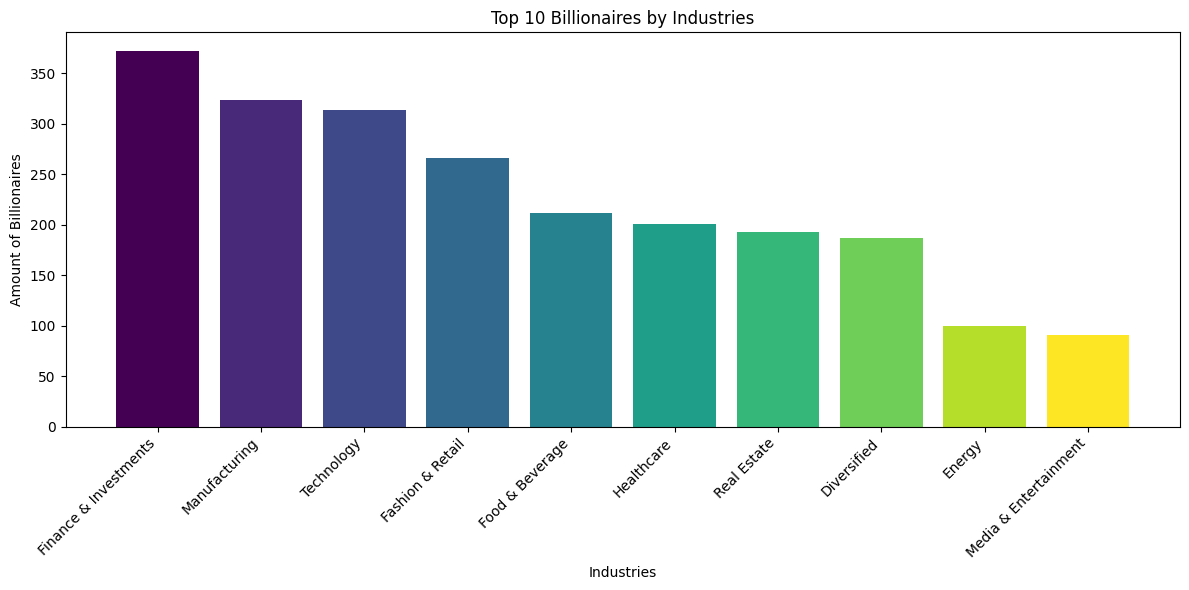

In [15]:
# Generate a color map with a distinct color for each bar

colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_industries)))

# Create a bar plot to visualize the top 10 categories

plt.figure(figsize=(12, 6))
plt.bar(top_10_industries['industries'], top_10_industries['finalWorth'], color=colors)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Industries')
plt.ylabel('Amount of Billionaires')
plt.title('Top 10 Billionaires by Industries')
plt.tight_layout()
plt.show()

In [16]:
country_data = bl.groupby('country').count().reset_index()
top_10_country = country_data.sort_values(by='finalWorth', ascending=False).head(10)

From the graph above we can learn that the most billionaires deal with finance & investments

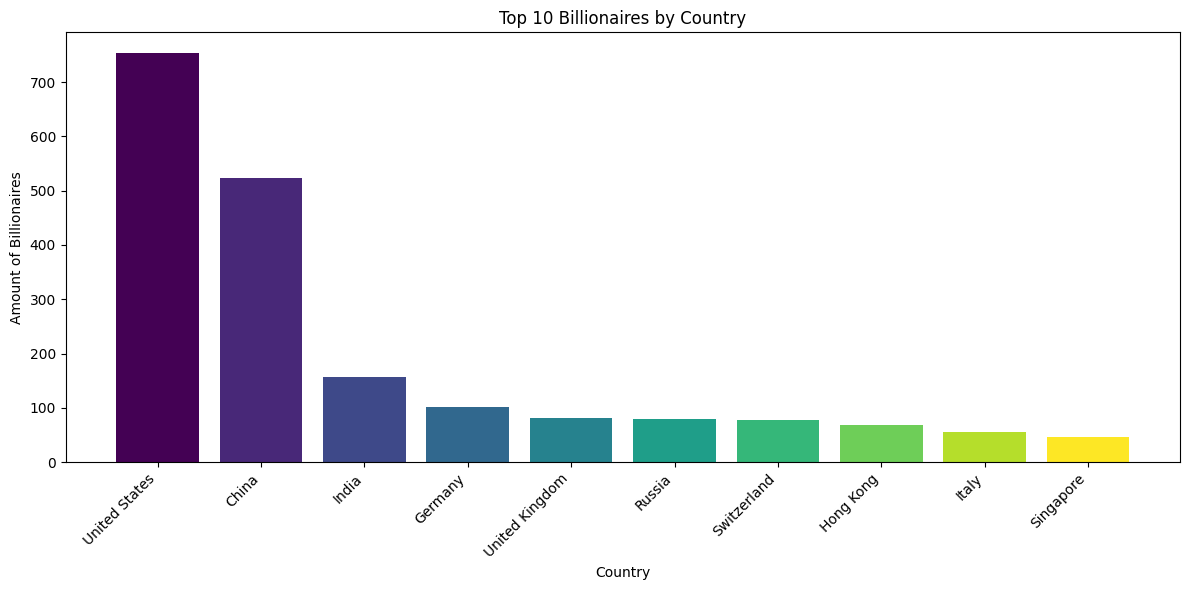

In [17]:
# Generate a color map with a distinct color for each bar

colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_country)))

# Create a bar plot to visualize the top 10 categories

plt.figure(figsize=(12, 6))
plt.bar(top_10_country['country'], top_10_country['finalWorth'], color=colors)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Country')
plt.ylabel('Amount of Billionaires')
plt.title('Top 10 Billionaires by Country')
plt.tight_layout()
plt.show()

We can see that in USA is the country with the most amount of billionaires and the next one is China.
What is interesting to see is that after these two countries the amount of billions drops significantly, it can point us to the essence of the economy of the country. We can understand it because the population of China is about 4 times larger than the population of the United States but the amount of billionaires in U.S.A is larger thane the amount of billionaires in China. What most strongly indicates the nature of the country's economy is the fact that the population sizes of China and India are more or less the same.

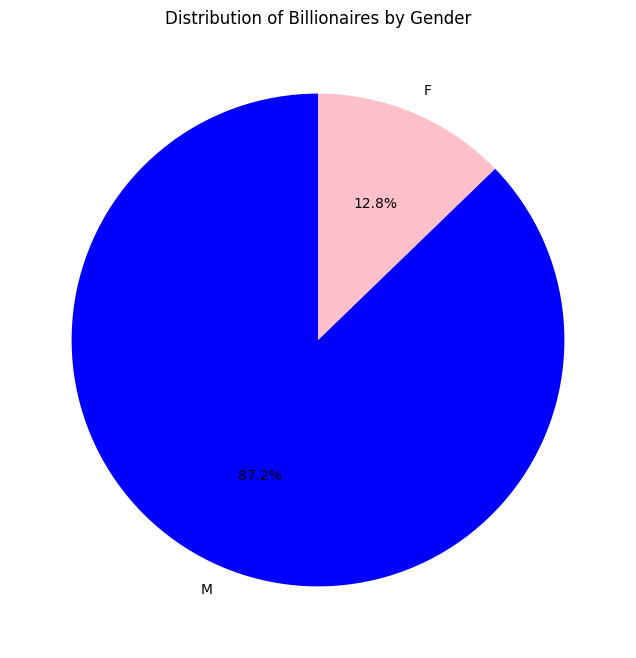

In [18]:
# Assuming 'gender' is a column in your DataFrame

# Group data by gender and count the number of billionaires in each gender
gender_counts = bl['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Distribution of Billionaires by Gender')
plt.show()

We can saw that the most billionaires in the DB is male. Researches show that the number of men and women in the world is roughly equal so this DB points us about something problematic. The DB shows us the inequality that exists in the world between men and women in everything related to the economy and money.

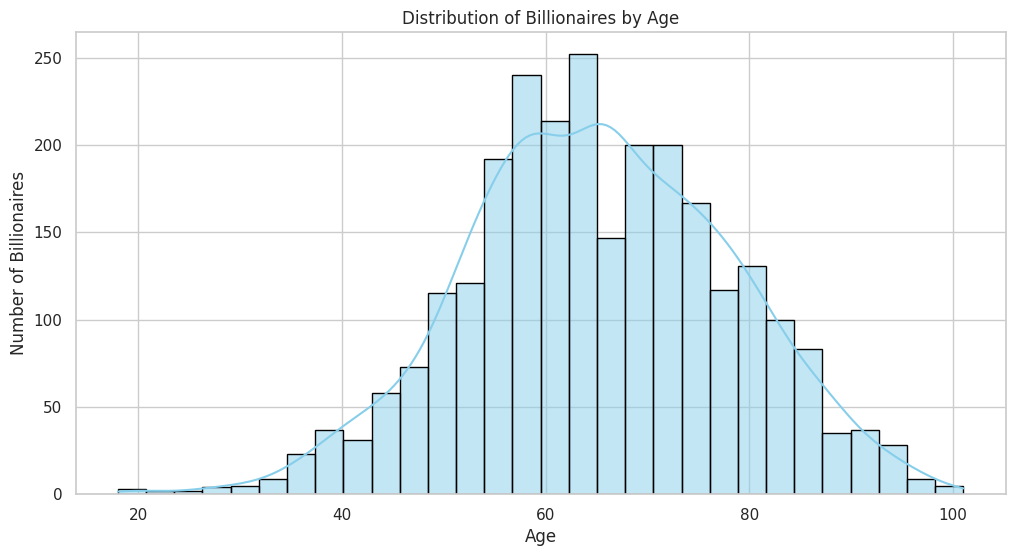

In [19]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=bl, x='age', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Billionaires by Age')
plt.xlabel('Age')
plt.ylabel('Number of Billionaires')
plt.show()


We can see from the graph above that most of the billionaires that are 55-65 years. In most countries of the world, the retirement age is 65 years, which means that most of the billionaires are at retirement age or nearing retirement age

### How many people became rich themselves and how many inherited their wealth?

In [20]:
self_made = bl["selfMade"].value_counts()
self_made= pd.DataFrame({"frequency": self_made, "percentage": self_made/(self_made.sum())*100})
self_made

,frequency,percentage
selfMade,,
True,1812,68.636364
False,828,31.363636


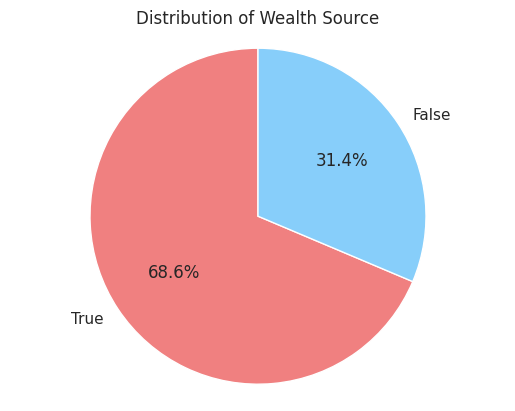

In [21]:
# Assuming self_made_pro is your DataFrame
# If not, replace it with the actual DataFrame name
labels = self_made.index
sizes = self_made['percentage']
colors = ['lightcoral', 'lightskyblue']  # You can customize the colors if needed

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Wealth Source')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


We can see in the graph above that most people earn their wealth on their own and do not inherit it. 